# Motivation: regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
def generate_samples(x):
    return x + np.random.normal(0.0, 2, size=len(x))

In [3]:
xtrain = np.random.uniform(low=0, high=10, size=10)
ytrain = generate_samples(xtrain)

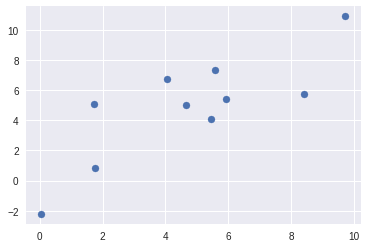

In [4]:
plt.scatter(xtrain,ytrain)

In [5]:
def plot_fit(degree, xtest=None, ytest=None):
    p = np.polyfit(xtrain,ytrain,degree)
    xfit = np.linspace(0, 10, 1000)
    yfit = np.polyval(p, xfit)
    plt.plot(xfit, yfit)
    plt.scatter(xtrain,ytrain, label='training')
    if xtest is not None and ytest is not None:
        plt.scatter(xtest, ytest, c='maroon', label='testing')
    plt.legend(loc='upper left')

In [6]:
from ipywidgets import interact, widgets

In [7]:
interact(lambda degree: plot_fit(degree), degree=widgets.IntSlider(min=1,max=10,step=1,value=1))

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.<lambda>(degree)>

In [8]:
xtest = np.random.uniform(low=0, high=10, size=10)
ytest = generate_samples(xtest)
interact(lambda degree: plot_fit(degree, xtest, ytest), degree=widgets.IntSlider(min=1,max=10,step=1,value=1))

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.<lambda>(degree)>

# Motivation: classification

In [9]:
from scipy.spatial import KDTree
from scipy.stats import multivariate_normal

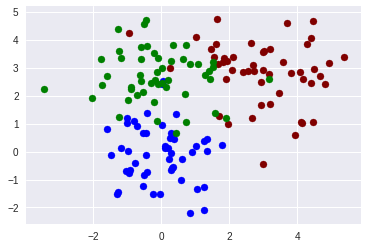

In [10]:
def generate_blob(mean, scale=1, size=10):
    data = multivariate_normal.rvs(mean, cov=scale, size=size)
    x = data[:,0]
    y = data[:,1]
    return x,y

x1, y1 = generate_blob([0,0], scale=1, size=50)
x2, y2 = generate_blob([3,3], scale=1, size=50)
x3, y3 = generate_blob([0,3], scale=1, size=50)
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='maroon')
plt.scatter(x3, y3, c='green')

In [11]:
class NearestNeighborClassifier:
    def fit(self, blobs):
        self._trees = []
        for blob in blobs:
            self._trees.append(KDTree(np.array(blob).T))
    def predict(self, data):
        classification = np.zeros(len(data))
        for i,d in enumerate(data):
            distances = [tree.query(d)[0] for tree in self._trees]
            classification[i] = np.argmin(distances)
        return classification


In [12]:
classifier = NearestNeighborClassifier()
classifier.fit([[x1,y1], [x2,y2], [x3,y3]])

In [13]:
classifier.predict(np.array([[0,0], [3,3], [0,3]]))

array([ 0.,  1.,  2.])

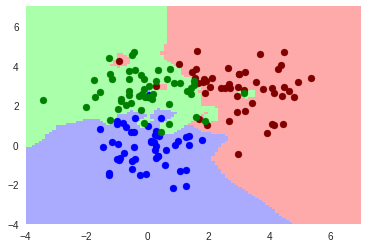

In [15]:
from matplotlib.colors import ListedColormap

def plot_nn():
    cmap = ListedColormap([  '#AAAAFF','#FFAAAA','#AAFFAA'])

    x_min, x_max = -4, 7
    y_min, y_max = -4, 7
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

    # Plot also the training points
    plt.scatter(x1, y1, c='blue')
    plt.scatter(x2, y2, c='maroon')
    plt.scatter(x3, y3, c='green')
    plt.axis('tight')
plot_nn()